**Задание**

Исследовать среднюю температуру за 31 день(дней) в городах Осака и Санкт-Петербург, исследовать параметры распределения, построить график полигона частот температур и гистограмму относительных частот. Отметить на графике моду и медиану выборки.

In [44]:
#---------Исходные-данные----------
#--Названия-городов--
city1 = 'Осака'
city2 = 'Санкт-Петербург'
#--Месяц-и-год--
mounth = 3
year = 2016
#--Значения-температуры--
# https://www.holiday-weather.com/osaka/march/2017/#calendar
t1 = [7, 10, 8, 9, 10, 10, 7, 5, 7, 8, 7, 8, 10, 9, 7, 8, 8, 9, 11, 12, 10, 9, 10, 9, 9, 9, 10, 9, 11, 14, 9]
# https://spb.nuipogoda.ru/%D0%BC%D0%B0%D1%80%D1%82-2017
t2 = [7, 4, 3, 2, -2, -1, 1, 4, 6, 2, 3, 3, 2, 5, 6, 6, 5, 4, 6, 8, 8, 6, 5, 2, 2, 4, 5, 3, 1, 1, 5]

**Исходные данные.**

In [20]:
import pandas as pd
import datetime

table1 = pd.DataFrame(data = {
    'Дата': [datetime.datetime(year, mounth, i).strftime('%d.%m.%Y') for i in range(1, len(t1) + 1)],
    city1: t1,
    city2: t2
}).style.set_table_styles([
    {'selector': '.row_heading, .blank', 'props': [('display', 'none;')]}
])
table1

,Дата,Осака,Санкт-Петербург
0,01.03.2016,7,7
1,02.03.2016,10,4
2,03.03.2016,8,3
3,04.03.2016,9,2
4,05.03.2016,10,-2
5,06.03.2016,10,-1
6,07.03.2016,7,1
7,08.03.2016,5,4
8,09.03.2016,7,6
9,10.03.2016,8,2


In [56]:
days = len(t1)
# Варианты, частоты и относительные частоты
v1 = sorted(list(set(t1)))
ch1 = [t1.count(tmp) for tmp in v1]
rel_ch1 = [tmp / days for tmp in ch1]
v2 = sorted(list(set(t2)))
ch2 = [t2.count(tmp) for tmp in v2]
rel_ch2 = [tmp / days for tmp in ch2]
# Выборочные средние
xn1 = sum(v1) / len(v1)
xn2 = sum(v2) / len(v2)
# Среднеквадратическое отклонение
diff1 = [(tmp - xn1)**2 for tmp in v1]
diff2 = [(tmp - xn2)**2 for tmp in v2]
# Дисперсия
d1 = sum(diff1) / len(v1)
d2 = sum(diff2) / len(v2)
# Коэффициент вариации
var1 = d1**0.5 / xn1
var2 = d2**0.5 / xn2

**Вариационный ряд**

Осака:

In [52]:
table2 = pd.DataFrame(data = {
    'Варианта': v1,
    '(xi - xn)^2': diff1,
    'Частота': ch1,
    'Относительная частота': rel_ch1
}).style.set_table_styles([
    {'selector': '.row_heading, .blank', 'props': [('display', 'none;')]}
])
table2

,Варианта,(xi - xn)^2,Частота,Относительная частота
0,5,20.25,1,0.0322581
1,7,6.25,5,0.16129
2,8,2.25,5,0.16129
3,9,0.25,9,0.290323
4,10,0.25,7,0.225806
5,11,2.25,2,0.0645161
6,12,6.25,1,0.0322581
7,14,20.25,1,0.0322581


Санкт-Петербург:

In [53]:
table3 = pd.DataFrame(data = {
    'Варианта': v2,
    '(xi - xn)^2': diff2,
    'Частота': ch2,
    'Относительная частота': rel_ch2
}).style.set_table_styles([
    {'selector': '.row_heading, .blank', 'props': [('display', 'none;')]}
])
table3

,Варианта,(xi - xn)^2,Частота,Относительная частота
0,-2,28.09,1,0.0322581
1,-1,18.49,1,0.0322581
2,1,5.29,3,0.0967742
3,2,1.69,5,0.16129
4,3,0.09,4,0.129032
5,4,0.49,4,0.129032
6,5,2.89,5,0.16129
7,6,7.29,5,0.16129
8,7,13.69,1,0.0322581
9,8,22.09,2,0.0645161


**Расчет основных параметров**

In [75]:
table3 = pd.DataFrame(data = {
    'Показатель': ['Выборочная средняя xn', 'Дисперсия Dr', 'Коэффициент вариации V'],
    city1: [xn1, d1, var1],
    city2: [xn2, d2, var2],
}).style.set_table_styles([
    {'selector': '.row_heading, .blank', 'props': [('display', 'none;')]}
])
table3

,Показатель,Осака,Санкт-Петербург
0,Выборочная средняя xn,9.5,3.3
1,Дисперсия Dr,7.25,10.01
2,Коэффициент вариации V,0.28343,0.958745


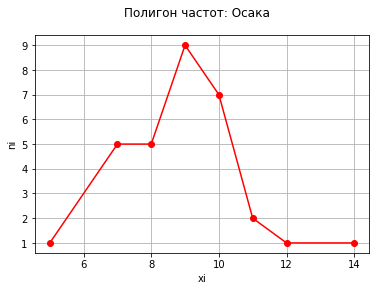

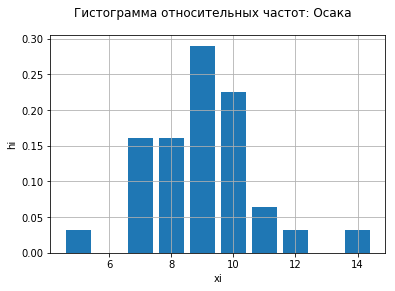

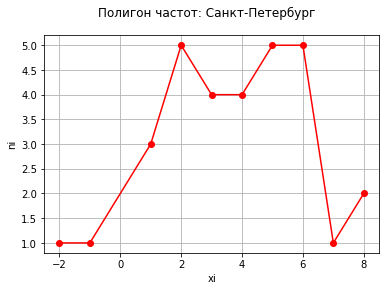

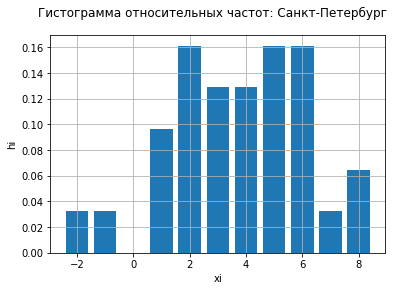

In [100]:
import matplotlib.pyplot as plt

def build_dots(xs, ys, t, xl, yl, bar = False):
    if not bar:
        plt.plot(xs, ys, 'ro-')
    else:
        plt.bar(xs, ys)
    plt.grid()
    plt.suptitle(t)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show()

build_dots(v1, ch1, f'Полигон частот: {city1}', 'xi', 'ni')
build_dots(v1, rel_ch1, f'Гистограмма относительных частот: {city1}', 'xi', 'hi', True)
build_dots(v2, ch2, f'Полигон частот: {city2}', 'xi', 'ni')
build_dots(v2, rel_ch2, f'Гистограмма относительных частот: {city2}', 'xi', 'hi', True)